In [1]:
import numpy as np
import pandas as pd
from scipy.stats import levene, shapiro, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from scipy.stats import chisquare,chi2_contingency
import scipy.stats as stats

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
#Checking if there are any missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#5 point summary of numerical attributes
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
df.groupby(['bmi', 'age', 'charges']).sum()

children
bmi    age charges              
15.960 18  1694.79640          0
16.815 21  3167.45585          1
       38  6640.54485          2
17.195 26  14455.64405         2
17.290 18  12829.45510         2
       28  3732.62510          0
       37  6877.98010          2
17.385 23  2775.19215          1
17.400 21  2585.26900          1
17.480 19  1621.34020          0
17.670 26  2680.94930          0
17.765 32  32734.18630         2
17.800 19  1727.78500          0
17.860 35  5116.50040          1
17.955 27  15006.57945         2
18.050 51  9644.25250          0
18.300 39  19023.26000         5
18.335 52  9991.03765          0
       57  11534.87265         0
       60  13204.28565         0
18.500 33  4766.02200          1
18.600 19  1728.89700          0
18.715 23  21595.38229         0
18.905 27  4827.90495          3
19.000 34  6753.03800          3
19.095 33  16776.30405         2
19.190 47  8627.54110          1
19.300 38  15820.69900         0
19.475 38  6933.24225          2
19.570 47  8428.06930          1
...                          ...
43.700 57  11576.13000         1
43.890 44  46200.98510         2
       46  8944.11510          3
44.000 61  13063.88300         0
44.220 30  4266.16580          2
       32  3994.17780          0
44.700 52  11411.68500         3
44.745 50  9541.69555          0
44.770 50  9058.73030          1
44.880 19  39722.74620         0
45.320 47  8569.86180          1
45.430 39  6356.27070          2
45.540 25  42112.23560         2
45.900 27  3693.42800          2
46.090 50  9549.56510          1
46.200 43  45863.20500         0
46.530 26  2927.06470          1
       32  4686.38870          2
       37  6435.62370          3
46.700 54  11538.42100         2
46.750 52  12592.53450         5
47.410 54  63770.42801         0
47.520 47  8083.91980          1
47.600 37  46113.51100         2
47.740 52  9748.91060          1
48.070 46  9432.92530          2
49.060 58  11381.32540         0
50.380 23  2438.05520          1
52.580 22  44501.39820         1
53.130 18  1163.46270          0

[1337 rows x 1 columns]

In [8]:
# skewness along the index axis 
df.skew(axis = 0, skipna = True)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [9]:
df1=df[['bmi','age','children','charges']]

In [10]:
q1, q3= np.percentile(df1,[25,75])

In [11]:
iqr = q3 - q1

In [12]:
#The below code will remove the outliers from the dataset
df_out = df1[~((df1 < (q1 - 1.5 * iqr)) |(df1 > (q3 + 1.5 * iqr))).any(axis=1)]

In [13]:
df_out

,bmi,age,children,charges


In [14]:
df_out.shape

(0, 4)

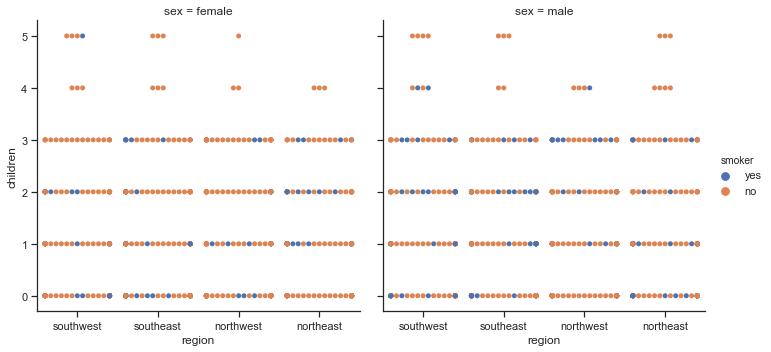

In [15]:
sns.catplot(x="region", y="children", hue="smoker",
            col="sex", aspect=1,
            kind="swarm", data=df);

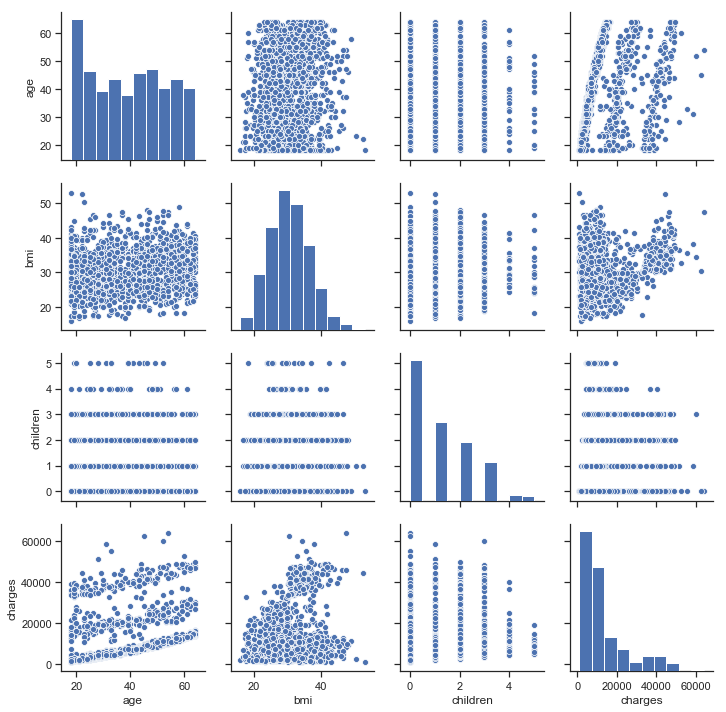

In [16]:
sns.pairplot(df)

In [17]:
shapiro(df[df['smoker'] == 'yes'].charges)
#As p-value is less than 0.05%, the data is not normally distributed

(0.9395521879196167, 3.6251879276250065e-09)

In [18]:
f, p = f_oneway(df[df['smoker'] == 'yes'].charges,
                      df[df['smoker'] == 'no'].charges)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

# Since p-value<0.05 , we say that the charges of people who smoke is significantly different from those who don't smoke

One-way ANOVA
F value: 2177.614868056519
P value: 8.271435842182967e-283 



In [19]:
shapiro(df[df['sex'] == 'male'].charges)
#As p-value is less than 0.05%, the data is not normally distributed

(0.8228140473365784, 1.1788512419005296e-26)

In [20]:
f, p = f_oneway(df[df['sex'] == 'male'].bmi,
                      df[df['sex'] == 'female'].bmi)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

# Since p-value>0.05 , we say that the bmi of male and female population does not differ significantly.

One-way ANOVA
F value: 2.878969506932102
P value: 0.08997637178992055 



In [21]:
# Goodness of Fit Test between 2 categorical variables

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont = pd.crosstab(df["smoker"],
                   df["sex"])
cont

sex,female,male
smoker,,
no,547,517
yes,115,159


In [22]:
chi2_contingency(cont)

#The p-value < 0.05 hence we conclude that the 2 categorical variables are dependent

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 537.56651719],
        [135.56651719, 138.43348281]]))

In [23]:
stats.f_oneway(df['bmi'][df['children'] == 0][df['sex'] == 'female'], 
             df['bmi'][df['children'] == 1][df['sex'] == 'female'],
             df['bmi'][df['children'] == 2][df['sex'] == 'female'])

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In [24]:
#As the p value is >0.05%, there is a significant difference between bmi of differnt number of children of women